In [37]:
import numpy as np
import imageio
from matplotlib import pylab as plt
import matplotlib.cm as cm
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [38]:
train_labels, train_data = [], []

for line in open("C:\\Users\\sidar\\Documents\\Study Materials\\Assignments\\Kuleshov AML\\faces\\faces\\train.txt"):
    im = imageio.imread("C:\\Users\\sidar\\Documents\\Study Materials\\Assignments\\Kuleshov AML\\faces\\"+line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])

train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)
print(train_data.shape, train_labels.shape)

(540, 2500) (540,)


In [39]:
test_labels, test_data = [], []

for line in open("C:\\Users\\sidar\\Documents\\Study Materials\\Assignments\\Kuleshov AML\\faces\\faces\\test.txt"):
    im = imageio.imread("C:\\Users\\sidar\\Documents\\Study Materials\\Assignments\\Kuleshov AML\\faces\\"+line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])

test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)
print(test_data.shape, test_labels.shape)

(100, 2500) (100,)


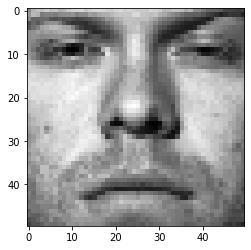

In [40]:
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

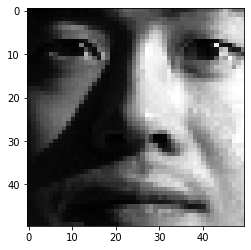

In [41]:
plt.imshow(test_data[11, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

In [42]:
avg_face = []
i = 0
while (i < train_data.shape[1]):
    avg_face.append(np.sum(train_data[:,i]))
    i+=1

avg_face = np.array(avg_face, dtype=float)
avg_face = avg_face / train_data.shape[0]
    
len(avg_face)

2500

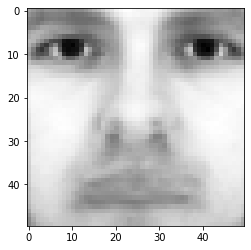

In [43]:
plt.imshow(avg_face.reshape(50,50), cmap = cm.Greys_r)
plt.show()

In [44]:
X = []
X_test = []
i = 0
j = 0

while i<train_data.shape[0]:
    X.append(train_data[i,:] - avg_face)
    i += 1
    
while j<test_data.shape[0]:
    X_test.append(test_data[j,:] - avg_face)
    j += 1

In [45]:
X = np.array(X, dtype=float)
X_test = np.array(X_test, dtype=float)

X.shape

(540, 2500)

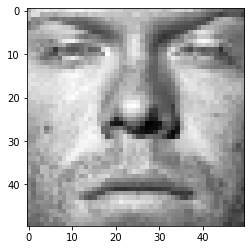

In [46]:
plt.imshow(X[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

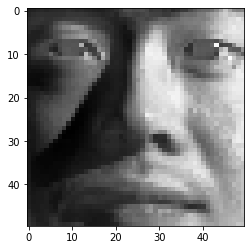

In [47]:
plt.imshow(X_test[11, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

In [48]:
u, s, vT = np.linalg.svd(X)

<Figure size 432x288 with 0 Axes>

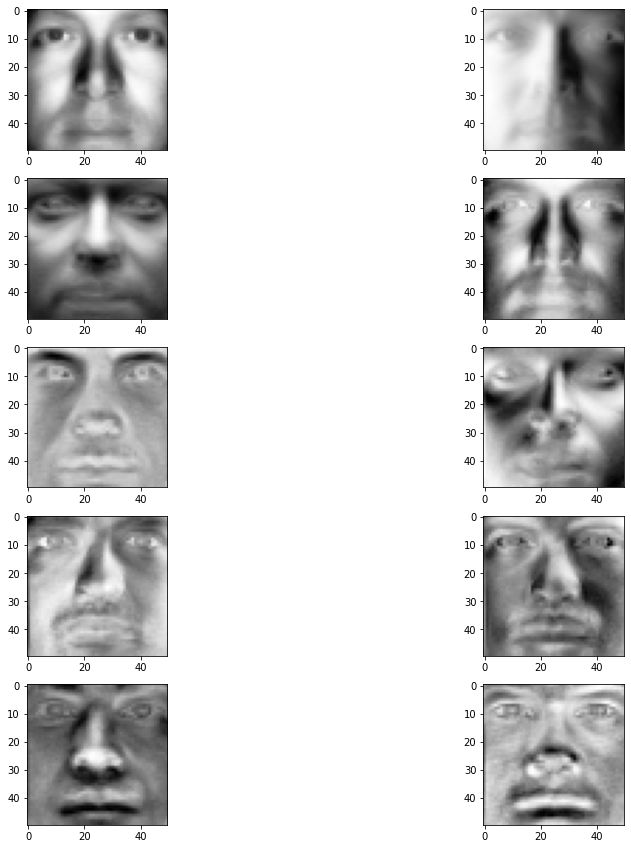

In [49]:
plt.figure()

f, ax = plt.subplots(5,2, figsize=(15,15))

ax[0,0].imshow(vT[0].reshape(50,50), cmap = cm.Greys_r)
ax[0,1].imshow(vT[1].reshape(50,50), cmap = cm.Greys_r)
ax[1,0].imshow(vT[2].reshape(50,50), cmap = cm.Greys_r)
ax[1,1].imshow(vT[3].reshape(50,50), cmap = cm.Greys_r)
ax[2,0].imshow(vT[4].reshape(50,50), cmap = cm.Greys_r)
ax[2,1].imshow(vT[5].reshape(50,50), cmap = cm.Greys_r)
ax[3,0].imshow(vT[6].reshape(50,50), cmap = cm.Greys_r)
ax[3,1].imshow(vT[7].reshape(50,50), cmap = cm.Greys_r)
ax[4,0].imshow(vT[8].reshape(50,50), cmap = cm.Greys_r)
ax[4,1].imshow(vT[9].reshape(50,50), cmap = cm.Greys_r)

In [50]:
r = 10

F = X.dot(vT[:r,:].T)
F_test = X_test.dot(vT[:r,:].T)

In [51]:
F.shape

(540, 10)

In [52]:
logreg = LogisticRegression(multi_class = "ovr", max_iter = 25000)
logreg.fit(F, train_labels)

LogisticRegression(max_iter=25000, multi_class='ovr')

In [53]:
score_train = logreg.score(X = F, y = train_labels)
print("Accuracy on the training set for r=10: " + str(score_train))

Accuracy on the training set for r=10: 0.7685185185185185


In [54]:
score_test = logreg.score(X = F_test, y = test_labels)
print("Accuracy on the test set for r=10: " + str(score_test))

Accuracy on the test set for r=10: 0.8


In [35]:
r = 1
scores = []
while r<=200:
    F = X.dot(vT[:r,:].T)
    F_test = X_test.dot(vT[:r,:].T)
    logreg.fit(F, train_labels)
    score_test = logreg.score(X = F_test, y = test_labels)
    scores.append(score_test)
    r+=1

In [56]:
count = []
i = 1
while i<=200:
    count.append(i)
    i+=1

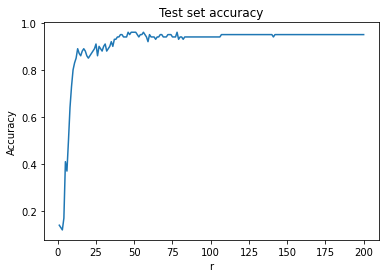

In [65]:
plt.plot(count, scores)
plt.xlabel("r")
plt.ylabel("Accuracy")
plt.title("Test set accuracy")
plt.show()